In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
X=pd.read_csv("Linear_X_Train.csv")
Y=pd.read_csv("Linear_Y_Train.csv")

In [4]:
X.head()

,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043


In [5]:
Y.head()

,y
0,-0.091101
1,-53.467721
2,75.457009
3,-12.025286
4,57.414187


In [6]:
X=X.values
Y=Y.values

In [7]:
u=X.mean()
std=X.std()
X=(X-u)/std

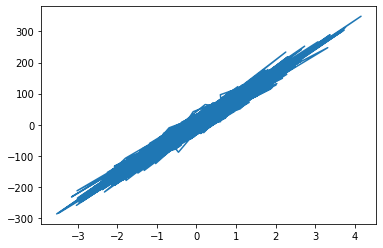

In [8]:
plt.plot(X,Y)
plt.show()

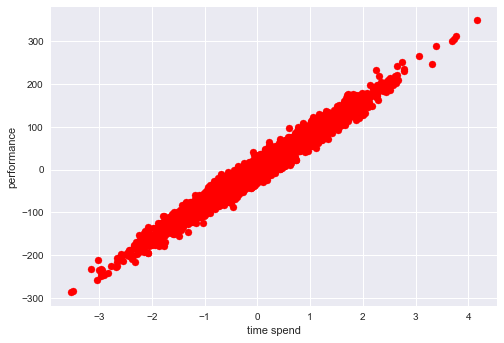

In [10]:
plt.style.use('seaborn')
plt.scatter(X,Y,color='red')
plt.xlabel("time spend")
plt.ylabel("performance")
plt.show()

In [11]:
def hypothesis(x,theta):
    return theta[0]+theta[1]*x

In [18]:
def gradient(X,Y,theta):
    grad=np.zeros((2,))
    m=X.shape[0]
    for i in range(m):
        y_=hypothesis(X[i],theta)
        y=Y[i]
        grad[0]+=(y_-y)
        grad[1]+=(y_-y)*X[i]
    return grad/m

In [19]:
def gradientdescent(X,Y,lr=0.1,maxitr=100):
    theta=np.zeros((2,))
    error_list=[]
    for i in range(maxitr):
        grad=gradient(X,Y,theta)
        e=error(X,Y,theta)
        theta[0]=theta[0]-lr*grad[0]
        theta[1]=theta[1]-lr*grad[1]
        error_list.append(e)
    return theta,error_list

In [20]:
def error(X,Y,theta):
    error=0.0
    m=X.shape[0]
    for i in range(m):
        y_=hypothesis(X[i],theta)
        y=Y[i]
        error+=(y_-y)**2
    return error/m

In [21]:
theta,error_list=gradientdescent(X,Y)

In [22]:
print(theta[0])
print(theta[1])

0.683850803499142
79.90361453434744


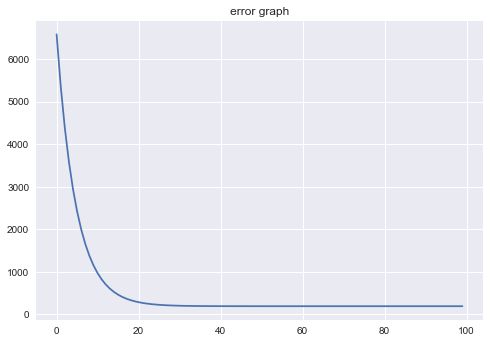

In [23]:
plt.style.use('seaborn')
plt.plot(error_list)
plt.title("error graph")
plt.show()

In [24]:
X_test=pd.read_csv("Linear_X_Test.csv")
X_test=X_test.values
Y_test=hypothesis(X_test,theta)

In [25]:
Y_test

array([[-149.37069577],
       [ -68.75494042],
       [-201.48687035],
       ...,
       [  10.9121384 ],
       [ -21.53235759],
       [ -53.68460035]])

In [35]:
Y_=hypothesis(X,theta)

In [36]:
Y_

array([[-19.5733619 ],
       [-43.69571729],
       [ 86.4848761 ],
       ...,
       [-20.85044708],
       [138.70197319],
       [-35.87897262]])

In [39]:

def score(Y,Y_):
    
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y- Y.mean())**2)
    score = (1- num/denom)
    return score*100

In [42]:
acc=score(Y,Y_)
print(acc)

97.09612226971643
